In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('../data/cleaned_data.xlsx', index_col=[0] )

In [3]:
df.columns

Index(['focal_addr', 'focal_addr_type', 'blacklist', 'tot_txn', 'tot_val',
       'min_val', 'max_val', 'sd2_val', 'unq_other_addr',
       'days_diff_first_last', 'contract_creation', 'recv_txn', 'tot_val_recv',
       'min_val_recv', 'max_val_recv', 'avg_val_recv', 'sd2_val_recv',
       'unq_from_addr', 'days_diff_first_last_recv', 'sent_txn',
       'tot_val_sent', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'sd2_val_sent', 'unq_to_addr', 'days_diff_first_last_sent',
       'to_contract_txn', 'tot_val_to_contract', 'min_val_to_contract',
       'max_val_to_contract', 'avg_val_to_contract', 'erc20_txn',
       'sum_val_erc20', 'erc721_txn', 'sum_val_erc721', 'days_since_last_txn'],
      dtype='object')

In [20]:
# Count the number of examples in each category
category_counts = df['blacklist'].value_counts()

# Set the number of examples to select from each category
num_examples_per_category = 2302 # take the count of the smallest category 

# Initialize an empty dataframe to store the selected examples
selected_data = pd.DataFrame()

# Loop over each category and select the desired number of examples
for category in category_counts.index:
    category_data = df[df['blacklist'] == category].sample(n=num_examples_per_category)
    selected_data = pd.concat([selected_data, category_data])

# Shuffle the selected examples
selected_data = selected_data.sample(frac=1)#.reset_index(drop=True)


In [21]:
selected_data

,focal_addr,focal_addr_type,blacklist,tot_txn,tot_val,min_val,max_val,sd2_val,unq_other_addr,days_diff_first_last,...,to_contract_txn,tot_val_to_contract,min_val_to_contract,max_val_to_contract,avg_val_to_contract,erc20_txn,sum_val_erc20,erc721_txn,sum_val_erc721,days_since_last_txn
2684,0x6d15bffb357c523469e8f54d3ff46e2f3e570a85,wallet address,1,40,2.790669e+18,0.000000e+00,4.915790e+17,1.414559e+34,20,60.218472,...,24,8.012000e+17,0.0,2.500000e+17,3.338333e+16,4,0.000000e+00,6,0.000000e+00,39
5141,0xd14ab59a934a22b072f331453c205f85c168aae4,wallet address,1,40,2.240154e+18,0.000000e+00,1.400000e+18,5.332039e+34,23,175.620266,...,34,0.000000e+00,0.0,0.000000e+00,0.000000e+00,6,0.000000e+00,4,0.000000e+00,87
5591,0xe2d4315f0e133f1bab84cde017a2656594e993d2,wallet address,0,21,6.198457e+18,3.305727e+16,1.045536e+18,9.635671e+34,3,177.580637,...,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0.000000e+00,166
5314,0xd7f13e03d1ec59d5ef17a0388afd994afdf675cb,wallet address,0,2,9.268649e+16,4.607749e+16,4.660900e+16,7.062572e+28,2,0.001806,...,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0.000000e+00,75
4886,0xc689a68e44cfcaca9c2b0e5a80c15639427b11b5,wallet address,1,298,5.862801e+19,0.000000e+00,3.000000e+18,2.355967e+35,72,157.225972,...,152,2.086726e+19,0.0,3.000000e+18,1.372846e+17,31,1.090000e+19,65,0.000000e+00,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,0xa9d499f4e14d5046cbdfd01cde3e8c3ea0ac94d7,wallet address,1,1,1.792440e+17,1.792440e+17,1.792440e+17,0.000000e+00,1,0.000000,...,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0.000000e+00,68
2227,0x5a0a6310c13375892cf64331008dd038f28b8e1d,wallet address,1,1075,3.855059e+20,0.000000e+00,2.600000e+19,2.151310e+36,81,175.396100,...,951,2.070132e+20,0.0,1.000000e+19,2.176795e+17,196,5.679000e+19,76,1.000000e+16,0
67,0x026d440e742e2e4e94ce0651ea7215e181652c68,contract address,1,160,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4,24.410405,...,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,160,0.000000e+00,0,0.000000e+00,169
3641,0x94a82e323a8c87dbeb6d474a60a09a9635bbf154,wallet address,1,54,4.975908e+17,0.000000e+00,1.723870e+17,1.132479e+33,45,32.078576,...,5,7.500000e+16,0.0,4.500000e+16,1.500000e+16,2,0.000000e+00,0,0.000000e+00,164


In [22]:
remaining_data = df[~df.isin(selected_data)].dropna()

In [23]:
remaining_data.to_csv('../data/remaining_data.csv', index=False)

In [24]:
selected_data.blacklist.value_counts()

1    2302
0    2302
Name: blacklist, dtype: int64

In [25]:
addr_type = {'wallet address' : 0 , 'contract address' : 1 }
selected_data['focal_addr_type'] = selected_data['focal_addr_type'].map(addr_type)

In [26]:
df.head()

,focal_addr,focal_addr_type,blacklist,tot_txn,tot_val,min_val,max_val,sd2_val,unq_other_addr,days_diff_first_last,...,to_contract_txn,tot_val_to_contract,min_val_to_contract,max_val_to_contract,avg_val_to_contract,erc20_txn,sum_val_erc20,erc721_txn,sum_val_erc721,days_since_last_txn
0,0x00000002de4e35b0838fe97e09bb26317c2e570c,contract address,0,402,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,70.540139,...,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0.000000e+00,17
1,0x0000000506063a51c6ce59906d8c40f7d7fe92a7,wallet address,1,16,1.843963e+19,0.000000e+00,1.800000e+19,1.892915e+37,13,153.244306,...,10,0.000000e+00,0.0,0.000000e+00,0.000000e+00,3,0.000000e+00,0,0.000000e+00,0
2,0x0000098a312e1244f313f83cac319603a97f4582,wallet address,1,8792,1.500201e+19,0.000000e+00,1.000000e+18,1.703185e+33,1486,103.834028,...,8493,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1356,0.000000e+00,4225,0.000000e+00,7
3,0x000677bbab0fea85506f5f63806d331c9c2df1ac,wallet address,0,1,7.287733e+14,7.287733e+14,7.287733e+14,0.000000e+00,1,0.000000,...,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0,0.000000e+00,0,0.000000e+00,178
4,0x000f4432a40560bbff1b581a8b7aded8dab80026,wallet address,1,247,4.243310e+19,0.000000e+00,8.200000e+18,5.954650e+35,91,179.527037,...,215,2.880170e+19,0.0,8.200000e+18,1.339614e+17,30,1.045000e+19,17,5.500000e+17,0


In [27]:
# separate features and target variable and remove the focal_addr as it adds no value to feature selection
X = selected_data.drop(['blacklist','focal_addr'], axis=1)
y = selected_data['blacklist']

# Robust Scaling: Robust scaling is a method that is designed to be resistant to outliers. This technique involves transforming the data by subtracting the median value and dividing by the interquartile range (IQR). The IQR is the range between the 25th and 75th percentiles of the data. This scaling method is robust because it uses the median and IQR rather than the mean and standard deviation, which can be affected by outliers.

In [28]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import RobustScaler
import pandas as pd


# Scale the data using RobustScaler
scaler = RobustScaler()
data_scaled = scaler.fit_transform(X)

# Perform feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k=15)
selector.fit(data_scaled, y)

# Get the selected features and their scores
scores = selector.scores_
features = X.columns.values[selector.get_support()]

selectk_df = pd.DataFrame(columns=['features', 'selectk_scores'])
# Print the selected features and their scores
for i, feature in enumerate(features):
    selectk_df.loc[i, 'features'] = feature
    selectk_df.loc[i, 'selectk_scores'] = scores[i]


In [29]:
selectk_df

,features,selectk_scores
0,focal_addr_type,8.505935
1,tot_txn,55.968982
2,tot_val,10.977762
3,unq_other_addr,1.927527
4,days_diff_first_last,7.018374
5,contract_creation,4.789234
6,sent_txn,18.211893
7,tot_val_sent,1737.85123
8,unq_to_addr,67.645765
9,days_diff_first_last_sent,5.555309


In [30]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression



# Create a logistic regression model
model = LogisticRegression()

# Use the RFE method to select the top k features
k = 15 # Number of top features to select
rfe = RFE(model, n_features_to_select=k)
rfe.fit(X, y)

# Get the indices of the selected features
indices = rfe.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[indices]

# Print the selected features
print(selected_features)


Index(['max_val_sent', 'avg_val_sent', 'sd2_val_sent', 'unq_to_addr',
       'days_diff_first_last_sent', 'to_contract_txn', 'tot_val_to_contract',
       'min_val_to_contract', 'max_val_to_contract', 'avg_val_to_contract',
       'erc20_txn', 'sum_val_erc20', 'erc721_txn', 'sum_val_erc721',
       'days_since_last_txn'],
      dtype='object')


/Users/princyiakov/.pyenv/versions/3.7.13/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/princyiakov/.pyenv/versions/3.7.13/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

In [31]:
selected_features

Index(['max_val_sent', 'avg_val_sent', 'sd2_val_sent', 'unq_to_addr',
       'days_diff_first_last_sent', 'to_contract_txn', 'tot_val_to_contract',
       'min_val_to_contract', 'max_val_to_contract', 'avg_val_to_contract',
       'erc20_txn', 'sum_val_erc20', 'erc721_txn', 'sum_val_erc721',
       'days_since_last_txn'],
      dtype='object')

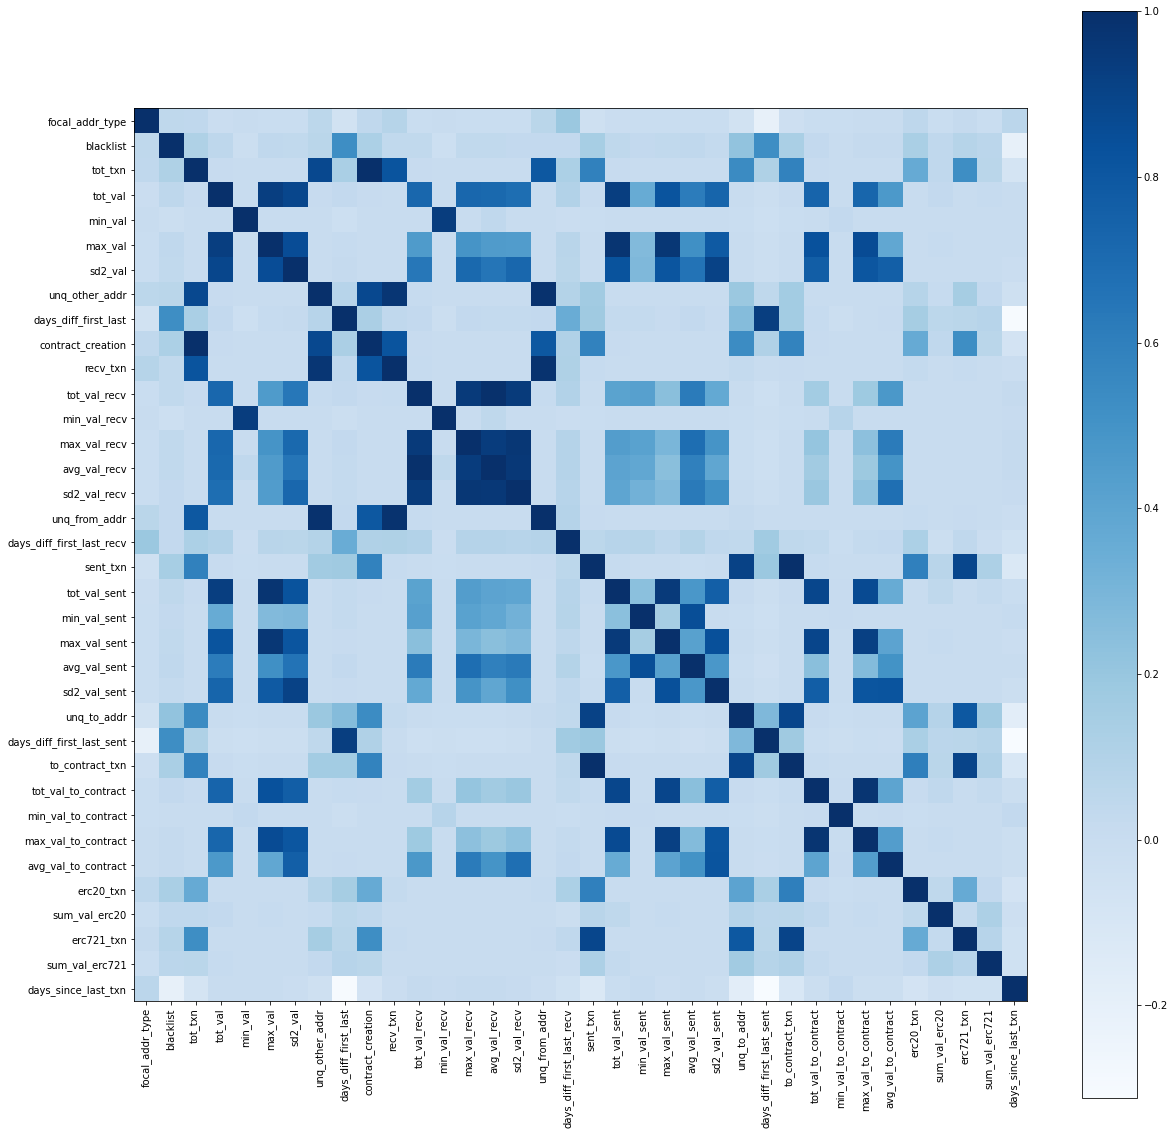

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


# Create the correlation matrix
corr_matrix = selected_data.corr()

# Create a heatmap using matplotlib
plt.figure(figsize=(20,20))
plt.imshow(corr_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)

plt.show()


In [33]:
# Create a dataframe to display the correlation coefficients with the other columns
corr_df = pd.DataFrame(corr_matrix['blacklist']).reset_index()
corr_df.columns = ['features', 'corrmat_scores']
corr_df = corr_df.sort_values('corrmat_scores', ascending=False).iloc[1:16, :]

# Display the results
print('Correlation coefficients with', 'blacklist', ':\n')
print(corr_df)


Correlation coefficients with blacklist :

                     features  corrmat_scores
25  days_diff_first_last_sent        0.526196
8        days_diff_first_last        0.523560
24                unq_to_addr        0.215607
18                   sent_txn        0.140960
31                  erc20_txn        0.128791
26            to_contract_txn        0.128648
9           contract_creation        0.120359
2                     tot_txn        0.109616
33                 erc721_txn        0.077971
7              unq_other_addr        0.062784
34             sum_val_erc721        0.059173
3                     tot_val        0.048783
19               tot_val_sent        0.045482
0             focal_addr_type        0.042952
32              sum_val_erc20        0.041013


### Lets check if scaling the data nakes any difference

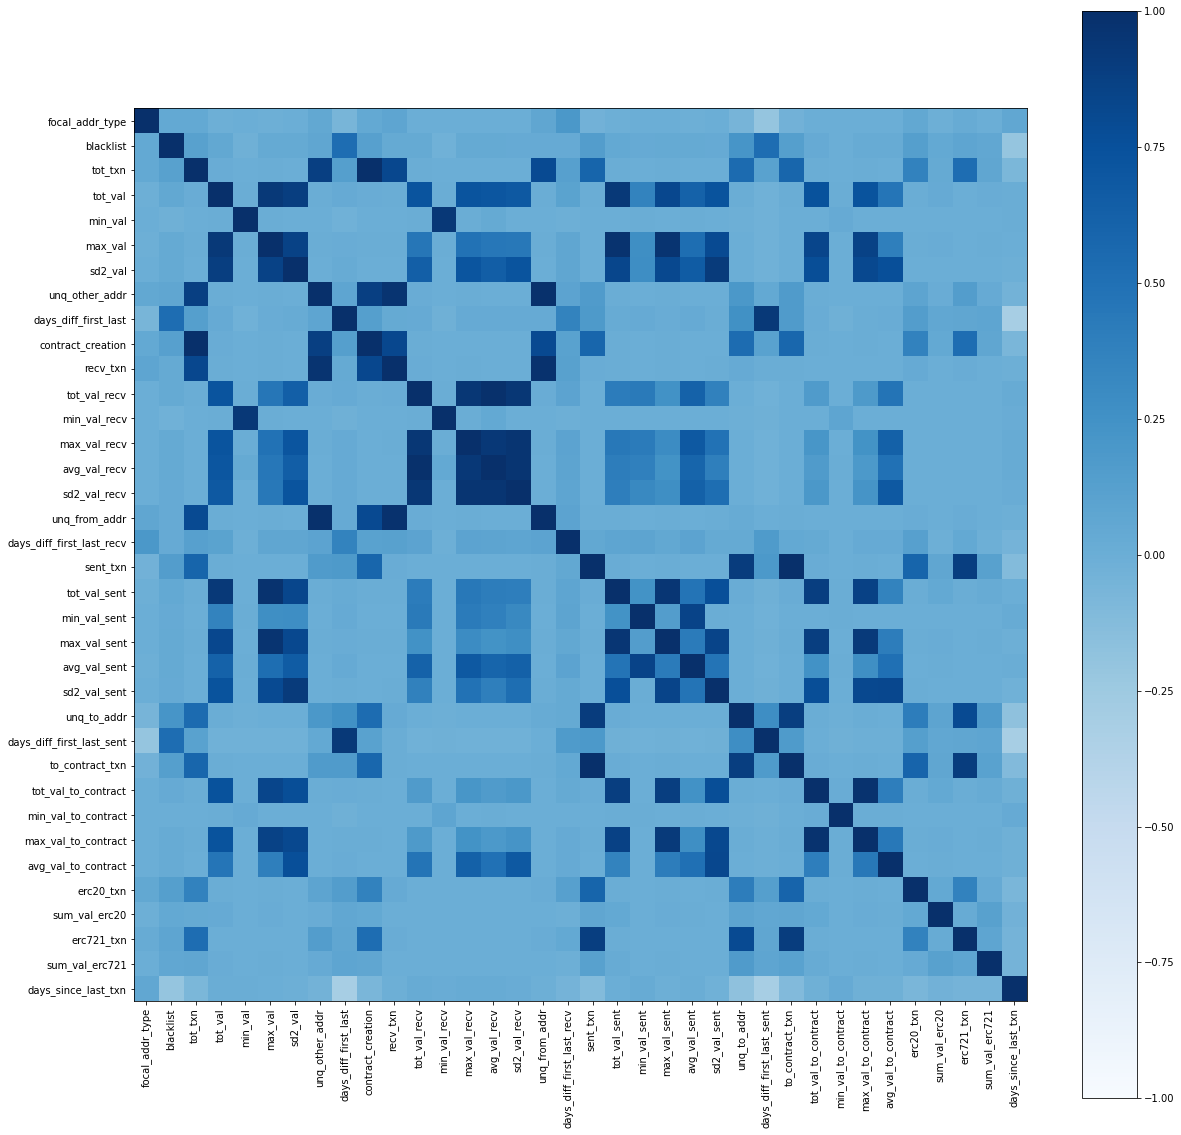

In [34]:
# Scale the data using RobustScaler
scaler = RobustScaler()
df_features = selected_data.drop('focal_addr', axis=1)
scaled_df = scaler.fit_transform(df_features)
corr_matrix_scaled = np.corrcoef(scaled_df, rowvar=False)

# Create the correlation matrix
#corr_matrix = scaled_df.corr()

# Create a heatmap using matplotlib
plt.figure(figsize=(20,20))
plt.imshow(corr_matrix_scaled, cmap='Blues', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(df_features.columns)), df_features.columns, rotation=90)
plt.yticks(range(len(df_features.columns)), df_features.columns)
plt.show()

In [35]:
column_to_examine = 'blacklist'
corr_with_column = corr_matrix_scaled[:,list(df_features).index(column_to_examine)]

# Create a dataframe to display the correlation coefficients with the other columns
corr_df_scaled = pd.DataFrame({'features': list(df_features), 'corrmat_scaled_scores': corr_with_column})
corr_df_scaled = corr_df_scaled.sort_values('corrmat_scaled_scores', ascending=False).iloc[1:16,:]

# Display the results
print('Correlation coefficients with', column_to_examine, ':\n')
print(corr_df_scaled)

Correlation coefficients with blacklist :

                     features  corrmat_scaled_scores
25  days_diff_first_last_sent               0.526196
8        days_diff_first_last               0.523560
24                unq_to_addr               0.215607
18                   sent_txn               0.140960
31                  erc20_txn               0.128791
26            to_contract_txn               0.128648
9           contract_creation               0.120359
2                     tot_txn               0.109616
33                 erc721_txn               0.077971
7              unq_other_addr               0.062784
34             sum_val_erc721               0.059173
3                     tot_val               0.048783
19               tot_val_sent               0.045482
0             focal_addr_type               0.042952
32              sum_val_erc20               0.041013


In [36]:
merged_scores = pd.merge(selectk_df, corr_df, on='features', how='outer').merge(corr_df_scaled, on='features', how='outer')


In [37]:
merged_scores.sort_values('corrmat_scores', ascending=False)

,features,selectk_scores,corrmat_scores,corrmat_scaled_scores
9,days_diff_first_last_sent,5.555309,0.526196,0.526196
4,days_diff_first_last,7.018374,0.523560,0.523560
8,unq_to_addr,67.645765,0.215607,0.215607
6,sent_txn,18.211893,0.140960,0.140960
11,erc20_txn,4.236556,0.128791,0.128791
10,to_contract_txn,5.561918,0.128648,0.128648
5,contract_creation,4.789234,0.120359,0.120359
1,tot_txn,55.968982,0.109616,0.109616
12,erc721_txn,5.063939,0.077971,0.077971
3,unq_other_addr,1.927527,0.062784,0.062784


## Removed highly corelated features by checking which feature is more corelated with the target

In [84]:
corr_threshold = 0.8
# Identify highly correlated features
corr_pairs = np.where(np.abs(corr_matrix) > corr_threshold)

# Create a dictionary to store the selected features
selected_features = {}

# Iterate over each correlated pair
for i, j in zip(*corr_pairs):
    # Skip diagonal elements and pairs that have already been processed
    if i == j or i in selected_features or j in selected_features:
        continue
    
    # Determine which feature has higher correlation with the target variable
    corr_i = np.abs(corr_matrix.iloc[i, 1])
    corr_j = np.abs(corr_matrix.iloc[j, 1])
    if corr_i >= corr_j:
        selected_features[corr_i] = corr_matrix.columns[i]
    else:
        selected_features[corr_j] = corr_matrix.columns[j]

# Create a list of selected features
selected_features_list = list(selected_features.values())


In [85]:
sorted_selected_features = dict(sorted(selected_features.items(), reverse=True))


In [86]:
sorted_selected_features

{0.5261958381593396: 'days_diff_first_last_sent',
 0.21560710977708125: 'unq_to_addr',
 0.1409601820893901: 'sent_txn',
 0.12864799525528922: 'to_contract_txn',
 0.12035893540293315: 'contract_creation',
 0.10961636816022988: 'tot_txn',
 0.06278365621589876: 'unq_other_addr',
 0.048782743311705144: 'tot_val',
 0.04548228315648391: 'tot_val_sent',
 0.03902240448142366: 'max_val',
 0.03840884975502926: 'avg_val_sent',
 0.034743750456194045: 'tot_val_recv',
 0.03472312793845492: 'recv_txn',
 0.03322396936461851: 'max_val_sent',
 0.03315370771771262: 'max_val_recv',
 0.03224288095630464: 'sd2_val',
 0.03127284486474748: 'avg_val_recv',
 0.030327273306458236: 'min_val_recv',
 0.02683507312861531: 'tot_val_to_contract',
 0.02486169893244802: 'sd2_val_sent'}

In [89]:
selected_features = list(sorted_selected_features.values())[:15]

In [90]:
selected_features

['days_diff_first_last_sent',
 'unq_to_addr',
 'sent_txn',
 'to_contract_txn',
 'contract_creation',
 'tot_txn',
 'unq_other_addr',
 'tot_val',
 'tot_val_sent',
 'max_val',
 'avg_val_sent',
 'tot_val_recv',
 'recv_txn',
 'max_val_sent',
 'max_val_recv']

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

# Preprocess data
X = selected_data[selected_features] # select relevant columns
y = selected_data['blacklist']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train) # scale data
X_test_scaled = scaler.transform(X_test) # scale data

In [64]:
y_test.shape

(921,)

### Lets start with very basic LogisticRegression 

In [66]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
# train the model on the training set
lr_model.fit(X_train_scaled, y_train)

# make predictions on the testing set
y_pred = lr_model.predict(X_test_scaled)


# calculate the Classification report  
report_lr_model = classification_report(y_test, y_pred)
print("classification_report:", report_lr_model) 

classification_report:               precision    recall  f1-score   support

           0       0.75      0.96      0.84       468
           1       0.94      0.68      0.79       453

    accuracy                           0.82       921
   macro avg       0.85      0.82      0.82       921
weighted avg       0.85      0.82      0.82       921



/Users/princyiakov/.pyenv/versions/3.7.13/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## From the results of the pairplot, maybe RandomForest will be a good option ?


In [67]:
from sklearn.ensemble import RandomForestClassifier

# initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model on the training set
rf_model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = rf_model.predict(X_test)


# calculate the Classification report  
report_rf_model = classification_report(y_test, y_pred)
print("classification_report:", report_rf_model) 

classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       468
           1       1.00      1.00      1.00       453

    accuracy                           1.00       921
   macro avg       1.00      1.00      1.00       921
weighted avg       1.00      1.00      1.00       921



In [68]:
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='f1')

# Print the cross-validation scores
print(scores)

[1.         1.         1.         0.99865047 1.        ]


In [69]:
y_pred_proba = rf_model.predict_proba(X_test)

In [70]:
numeric_features = df.drop(['focal_addr_type', 'focal_addr'], axis=1).columns.to_list()

In [71]:
selected_features

['days_diff_first_last_sent',
 'unq_to_addr',
 'sent_txn',
 'to_contract_txn',
 'contract_creation',
 'tot_txn',
 'unq_other_addr',
 'tot_val',
 'tot_val_sent',
 'max_val',
 'avg_val_sent',
 'tot_val_recv',
 'recv_txn',
 'max_val_sent',
 'max_val_recv']

## Lets Create a pipeline

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Pipeline to fill missing values, transform and scale the numeric columns
numeric_features =  ['days_diff_first_last_sent',
                     'unq_to_addr',
                     'sent_txn',
                     'to_contract_txn',
                     'contract_creation',
                     'tot_txn',
                     'unq_other_addr',
                     'tot_val',
                     'tot_val_sent',
                     'max_val',
                     'avg_val_sent',
                     'tot_val_recv',
                     'recv_txn',
                     'max_val_sent',
                     'max_val_recv']

numeric_transformer = Pipeline([('imputer', SimpleImputer(missing_values= np.nan, strategy='constant', fill_value=0)),
                                ('scaler', RobustScaler())])

# Pipeline to fill missing values and one hot encode the categorical values
categorical_transformer = Pipeline([
        ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False)) ])

# Initiate Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)    ]
)

# Pipeline for the Random Forest Model
random_forest_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])


In [75]:
X_train

,days_diff_first_last_sent,unq_to_addr,sent_txn,to_contract_txn,contract_creation,tot_txn,unq_other_addr,tot_val,tot_val_sent,max_val,avg_val_sent,tot_val_recv,recv_txn,max_val_sent,max_val_recv
1028,176.489965,35,55,50,55,55,35,1.586738e+18,1.586738e+18,3.916630e+17,2.884979e+16,0.000000e+00,0,3.916630e+17,0.000000e+00
388,0.000000,1,1,0,1,1,1,3.022860e+17,3.022860e+17,3.022860e+17,3.022860e+17,0.000000e+00,0,3.022860e+17,0.000000e+00
107,0.003611,3,5,5,5,5,3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00
4978,0.000000,1,1,0,0,1,1,1.789195e+17,1.789195e+17,1.789195e+17,1.789195e+17,0.000000e+00,0,1.789195e+17,0.000000e+00
977,24.264444,4,6,6,6,6,4,3.000000e+16,3.000000e+16,3.000000e+16,5.000000e+15,0.000000e+00,0,3.000000e+16,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,0.000000,1,1,0,0,2,2,4.885303e+17,2.436698e+17,2.448605e+17,2.436698e+17,2.448605e+17,1,2.436698e+17,2.448605e+17
1517,168.766377,55,88,86,88,88,55,2.813966e+17,2.813966e+17,1.193810e+17,3.197689e+15,0.000000e+00,0,1.193810e+17,0.000000e+00
2514,89.994306,13,30,28,30,30,13,6.350000e+18,6.350000e+18,1.200000e+18,2.116667e+17,0.000000e+00,0,1.200000e+18,0.000000e+00
3189,1.979861,10,19,17,23,23,11,4.381718e+16,0.000000e+00,1.592060e+16,0.000000e+00,4.381718e+16,4,0.000000e+00,1.592060e+16


In [76]:
# train the model on the training set
random_forest_model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = random_forest_model.predict(X_test)


# calculate the Classification report  
report_random_forest_model = classification_report(y_test, y_pred)
print("classification_report:", report_random_forest_model) 

classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       468
           1       1.00      1.00      1.00       453

    accuracy                           1.00       921
   macro avg       1.00      1.00      1.00       921
weighted avg       1.00      1.00      1.00       921



### Save the Robust Scalar and RF model 


In [77]:
import joblib 

# then just 'dump' your file
joblib.dump(scaler, '../models/robust_scalar.pkl') 
joblib.dump(rf_model, '../models/rf_model.pkl') 

['../models/rf_model.pkl']

### We'll be using the pipeline for the final prediction

In [78]:
joblib.dump(random_forest_model, '../models/rf_model_with_pipeline.pkl') 

['../models/rf_model_with_pipeline.pkl']